In [1]:
import os
import copy

from astropy.io import ascii as asc
from astropy.io import fits
from astropy.time import Time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn-paper')
import spectroscopy as spec
from supernova import LightCurve2
import define_filters
from visualization import set_bright_colors

ImportError: No module named 'spectroscopy'

In [ ]:
set_bright_colors()

Confirmed that scaled spectra files have not been de-redshifted

In [ ]:
FIG_DIR = '../figures'
neb_repo = '/Users/bostroem/Desktop/research/asassn15oz/data/spectra/EFOSC/scaled'
model_repo = '../../nebular_spectra_OI/models/'

## Read in spectra and de-redshift

In [18]:
specfile_212 = os.path.join(neb_repo, 'tASASSN_15oz_20160410_Gr13_Free_slit1.5_57723_1_esca.asci') 
tbdata_212 = asc.read(specfile_212, names = ['wavelength', 'flux'])
wl_212 = spec.apply_redshift(tbdata_212['wavelength'], redshift=0.0069)
spectrum_212 = tbdata_212['flux']

In [17]:
specfile_340 = os.path.join(neb_repo, 'tASASSN_15oz_20160802_Gr13_Free_slit1.0_57723_1_esca.asci') 
#specfile = os.path.join(neb_repo, 'asassn15oz_20160919a_387dayssca.fits')#low S/N
tbdata_340 = asc.read(specfile_340, names = ['wavelength', 'flux'])
wl_340 = spec.apply_redshift(tbdata_340['wavelength'], redshift=0.0069)
spectrum_340 = tbdata_340['flux']

## Read in Models

In [23]:
modelfile12_212 = os.path.join(model_repo, 'mzams12_212d.dat')
modelfile15_212 = os.path.join(model_repo, 'mzams15_212d.dat')
modelfile19_212 = os.path.join(model_repo, 'mzams19_212d.dat')
modelfile25_212 = os.path.join(model_repo, 'mzams25_212d.dat')

In [22]:
modelfile12_340 = os.path.join(model_repo, 'mzams12_306d.dat')
modelfile15_340 = os.path.join(model_repo, 'mzams15_350d.dat')
modelfile19_340 = os.path.join(model_repo, 'mzams19_369d.dat')
modelfile25_340 = os.path.join(model_repo, 'mzams25_369d.dat')

In [25]:
mod12_212 = asc.read(modelfile12_212, names = ['wavelength', 'flux'])
mod15_212 = asc.read(modelfile15_212, names = ['wavelength', 'flux'])
mod19_212 = asc.read(modelfile19_212, names = ['wavelength', 'flux'])
mod25_212 = asc.read(modelfile25_212, names = ['wavelength', 'flux'])

In [24]:
mod12_340 = asc.read(modelfile12_340, names = ['wavelength', 'flux'])
mod15_340 = asc.read(modelfile15_340, names = ['wavelength', 'flux'])
mod19_340 = asc.read(modelfile19_340, names = ['wavelength', 'flux'])
mod25_340 = asc.read(modelfile25_340, names = ['wavelength', 'flux'])

## Create Spectrum Objects

In [178]:
mod_spec12_212 = spec.spectrum1d(mod12_212['wavelength'], mod12_212['flux'])
mod_spec15_212 = spec.spectrum1d(mod15_212['wavelength'], mod15_212['flux'])
mod_spec19_212 = spec.spectrum1d(mod19_212['wavelength'], mod19_212['flux'])
mod_spec25_212 = spec.spectrum1d(mod25_212['wavelength'], mod25_212['flux'])
data_spec_212 = spec.spectrum1d(wl_212, spectrum_212)

In [177]:
mod_spec12_340 = spec.spectrum1d(mod12_340['wavelength'], mod12_340['flux'])
mod_spec15_340 = spec.spectrum1d(mod15_340['wavelength'], mod15_340['flux'])
mod_spec19_340 = spec.spectrum1d(mod19_340['wavelength'], mod19_340['flux'])
mod_spec25_340 = spec.spectrum1d(mod25_340['wavelength'], mod25_340['flux'])
data_spec_340 = spec.spectrum1d(wl_340, spectrum_340)

# Scale Models to spectrum

In [179]:
Ni_mass_mod = 0.062 #Msun
d_mod = 5.5 #Mpc
d_15oz = 28.83 #Mpc, NED Hubble + Virgo Infall
Co_halflife = 111.4

t_obs_340 = 340.0
t_mod_12_340 = 306.0
t_mod_15_340 = 350.0
t_mod_19_340 = 369.0
t_mod_25_340 = 369.0

t_obs_212 = 228.0
t_mod_12_212 = 212.0
t_mod_15_212 = 212.0
t_mod_19_212 = 212.0
t_mod_25_212 = 212.0

##### Scale by time difference

In [181]:
scale_time_mod_spec12_212 = copy.deepcopy(mod_spec12_212)
scale_time_mod_spec15_212 = copy.deepcopy(mod_spec15_212)
scale_time_mod_spec19_212 = copy.deepcopy(mod_spec19_212)
scale_time_mod_spec25_212 = copy.deepcopy(mod_spec25_212)
scale_time_mod_spec12_212.flux = scale_time_mod_spec12_212.flux*np.exp((t_mod_12_212-t_obs_212)/Co_halflife)
scale_time_mod_spec15_212.flux = scale_time_mod_spec15_212.flux*np.exp((t_mod_15_212-t_obs_212)/Co_halflife)
scale_time_mod_spec19_212.flux = scale_time_mod_spec19_212.flux*np.exp((t_mod_19_212-t_obs_212)/Co_halflife)
scale_time_mod_spec25_212.flux = scale_time_mod_spec25_212.flux*np.exp((t_mod_25_212-t_obs_212)/Co_halflife)

In [180]:
#Create new object
scale_time_mod_spec12_340 = copy.deepcopy(mod_spec12_340)
scale_time_mod_spec15_340 = copy.deepcopy(mod_spec15_340)
scale_time_mod_spec19_340 = copy.deepcopy(mod_spec19_340)
scale_time_mod_spec25_340 = copy.deepcopy(mod_spec25_340)
scale_time_mod_spec12_340.flux = scale_time_mod_spec12_340.flux*np.exp((t_mod_12_340-t_obs_340)/Co_halflife)
scale_time_mod_spec15_340.flux = scale_time_mod_spec15_340.flux*np.exp((t_mod_15_340-t_obs_340)/Co_halflife)
scale_time_mod_spec19_340.flux = scale_time_mod_spec19_340.flux*np.exp((t_mod_19_340-t_obs_340)/Co_halflife)
scale_time_mod_spec25_340.flux = scale_time_mod_spec25_340.flux*np.exp((t_mod_25_340-t_obs_340)/Co_halflife)

#### Scale model to observed spectrum by distance and Ni mass (empirically)

In [183]:
scale_mod12_212, scale_factor_12_212 =  spec.scale_spectra(scale_time_mod_spec12_212, data_spec_212, scale_factor=True)
scale_mod15_212, scale_factor_15_212 =  spec.scale_spectra(scale_time_mod_spec15_212, data_spec_212, scale_factor=True)
scale_mod19_212, scale_factor_19_212 =  spec.scale_spectra(scale_time_mod_spec19_212, data_spec_212, scale_factor=True)
scale_mod25_212, scale_factor_25_212 =  spec.scale_spectra(scale_time_mod_spec25_212, data_spec_212, scale_factor=True)

In [182]:
scale_mod12_340, scale_factor_12_340 =  spec.scale_spectra(scale_time_mod_spec12_340, data_spec_340, scale_factor=True)
scale_mod15_340, scale_factor_15_340 =  spec.scale_spectra(scale_time_mod_spec15_340, data_spec_340, scale_factor=True)
scale_mod19_340, scale_factor_19_340 =  spec.scale_spectra(scale_time_mod_spec19_340, data_spec_340, scale_factor=True)
scale_mod25_340, scale_factor_25_340 =  spec.scale_spectra(scale_time_mod_spec25_340, data_spec_340, scale_factor=True)

In [185]:
Ni_mass_12_212 = scale_factor_12_212*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 12 Msun @ 212 days = {}'.format(Ni_mass_12_212))
Ni_mass_15_212 = scale_factor_15_212*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 15 Msun @ 212 days = {}'.format(Ni_mass_15_212))
Ni_mass_19_212 = scale_factor_19_212*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 19 Msun @ 212 days = {}'.format(Ni_mass_19_212))
Ni_mass_25_212 = scale_factor_25_212*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 25 Msun @ 212 days = {}'.format(Ni_mass_25_212))

Ni mass for 12 Msun @ 212 days = 0.028835322163824124
Ni mass for 15 Msun @ 212 days = 0.028411554386257334
Ni mass for 19 Msun @ 212 days = 0.027742979343744766
Ni mass for 25 Msun @ 212 days = 0.029146984762086433


In [184]:
Ni_mass_12_340 = scale_factor_12_340*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 12 Msun @ 340 days = {}'.format(Ni_mass_12_340))
Ni_mass_15_340 = scale_factor_15_340*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 15 Msun @ 340 days = {}'.format(Ni_mass_15_340))
Ni_mass_19_340 = scale_factor_19_340*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 19 Msun @ 340 days = {}'.format(Ni_mass_19_340))
Ni_mass_25_340 = scale_factor_25_340*Ni_mass_mod * (d_15oz/d_mod)**2
print('Ni mass for 25 Msun @ 340 days = {}'.format(Ni_mass_25_340))

Ni mass for 12 Msun @ 340 days = 0.02146396542236847
Ni mass for 15 Msun @ 340 days = 0.02150460079490341
Ni mass for 19 Msun @ 340 days = 0.021769049707014734
Ni mass for 25 Msun @ 340 days = 0.022450491065877622


### Straight up scale

In [188]:
F_obs_max_12_212 = mod_spec12_212.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_12_212-t_obs_212)/Co_halflife)
F_obs_max_15_212 = mod_spec15_212.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_15_212-t_obs_212)/Co_halflife)
F_obs_max_19_212 = mod_spec19_212.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_19_212-t_obs_212)/Co_halflife)
F_obs_max_25_212 = mod_spec25_212.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_25_212-t_obs_212)/Co_halflife)

In [189]:
F_obs_min_12_212 = mod_spec12_212.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_12_212-t_obs_212)/Co_halflife)
F_obs_min_15_212 = mod_spec15_212.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_15_212-t_obs_212)/Co_halflife)
F_obs_min_19_212 = mod_spec19_212.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_19_212-t_obs_212)/Co_halflife)
F_obs_min_25_212 = mod_spec25_212.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_25_212-t_obs_212)/Co_halflife)

In [186]:
max_mass = 0.11 #Msun
min_mass = 0.08 #Msun

F_obs_max_12_340 = mod_spec12_340.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_12_340-t_obs_340)/Co_halflife)
F_obs_max_15_340 = mod_spec15_340.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_15_340-t_obs_340)/Co_halflife)
F_obs_max_19_340 = mod_spec19_340.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_19_340-t_obs_340)/Co_halflife)
F_obs_max_25_340 = mod_spec25_340.flux * (d_mod/d_15oz)**2 * max_mass/Ni_mass_mod * np.exp((t_mod_25_340-t_obs_340)/Co_halflife)

In [187]:
F_obs_min_12_340 = mod_spec12_340.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_12_340-t_obs_340)/Co_halflife)
F_obs_min_15_340 = mod_spec15_340.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_15_340-t_obs_340)/Co_halflife)
F_obs_min_19_340 = mod_spec19_340.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_19_340-t_obs_340)/Co_halflife)
F_obs_min_25_340 = mod_spec25_340.flux * (d_mod/d_15oz)**2 * min_mass/Ni_mass_mod * np.exp((t_mod_25_340-t_obs_340)/Co_halflife)

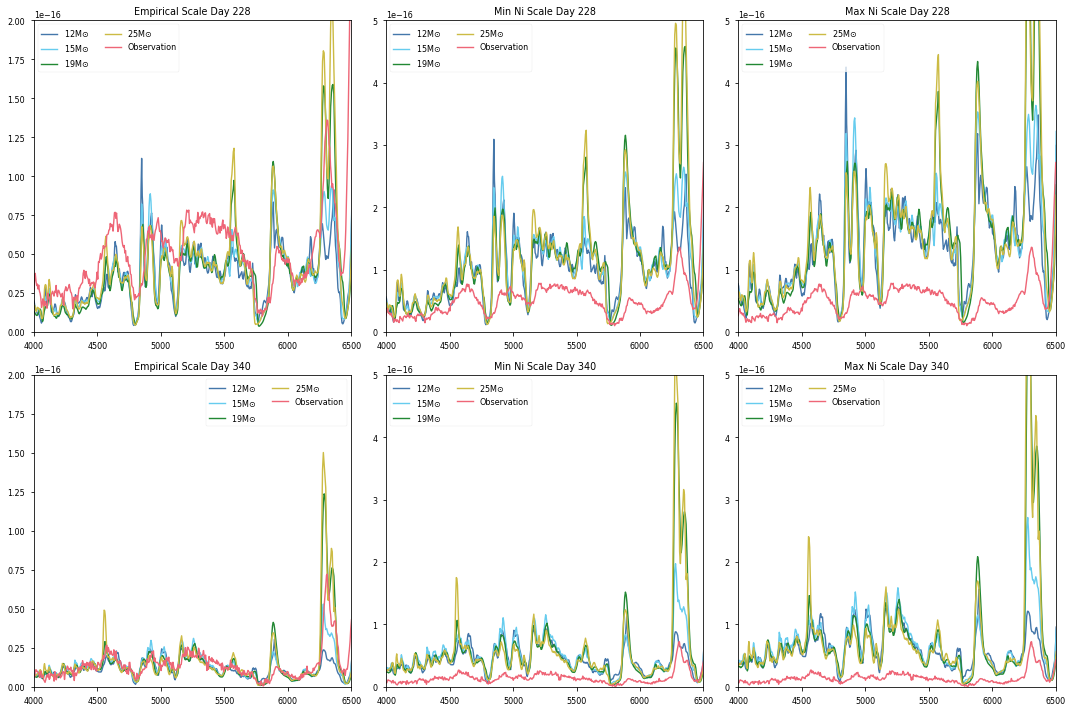

In [198]:
xmin = 4000
xmax = 6500

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


#Plot empirically scaled spectra
ax1.plot(scale_mod12_212.wave, scale_mod12_212.flux, label='12M$\odot$')
ax1.plot(scale_mod15_212.wave, scale_mod15_212.flux, label='15M$\odot$')
ax1.plot(scale_mod19_212.wave, scale_mod19_212.flux, label='19M$\odot$')
ax1.plot(scale_mod25_212.wave, scale_mod25_212.flux, label='25M$\odot$')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0,2E-16)
ax1.set_title('Empirical Scale Day 228')

ax4.plot(scale_mod12_340.wave, scale_mod12_340.flux, label='12M$\odot$')
ax4.plot(scale_mod15_340.wave, scale_mod15_340.flux, label='15M$\odot$')
ax4.plot(scale_mod19_340.wave, scale_mod19_340.flux, label='19M$\odot$')
ax4.plot(scale_mod25_340.wave, scale_mod25_340.flux, label='25M$\odot$')
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(0,2E-16)
ax4.set_title('Empirical Scale Day 340')

#Plot Min Ni Mass scale
ax2.plot(mod_spec12_212.wave, F_obs_min_12_212, label='12M$\odot$')
ax2.plot(mod_spec15_212.wave, F_obs_min_15_212, label='15M$\odot$')
ax2.plot(mod_spec19_212.wave, F_obs_min_19_212, label='19M$\odot$')
ax2.plot(mod_spec25_212.wave, F_obs_min_25_212, label='25M$\odot$')
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(0,5E-16)
ax2.set_title('Min Ni Scale Day 228')

ax5.plot(mod_spec12_340.wave, F_obs_min_12_340, label='12M$\odot$')
ax5.plot(mod_spec15_340.wave, F_obs_min_15_340, label='15M$\odot$')
ax5.plot(mod_spec19_340.wave, F_obs_min_19_340, label='19M$\odot$')
ax5.plot(mod_spec25_340.wave, F_obs_min_25_340, label='25M$\odot$')
ax5.set_xlim(xmin, xmax)
ax5.set_ylim(0,5E-16)
ax5.set_title('Min Ni Scale Day 340')

#Plot Max Ni Mass scale
ax3.plot(mod_spec12_212.wave, F_obs_max_12_212, label='12M$\odot$')
ax3.plot(mod_spec15_212.wave, F_obs_max_15_212, label='15M$\odot$')
ax3.plot(mod_spec19_212.wave, F_obs_max_19_212, label='19M$\odot$')
ax3.plot(mod_spec25_212.wave, F_obs_max_25_212, label='25M$\odot$')
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(0,5E-16)
ax3.set_title('Max Ni Scale Day 228')

ax6.plot(mod_spec12_340.wave, F_obs_max_12_340, label='12M$\odot$')
ax6.plot(mod_spec15_340.wave, F_obs_max_15_340, label='15M$\odot$')
ax6.plot(mod_spec19_340.wave, F_obs_max_19_340, label='19M$\odot$')
ax6.plot(mod_spec25_340.wave, F_obs_max_25_340, label='25M$\odot$')
ax6.set_xlim(xmin, xmax)
ax6.set_ylim(0,5E-16)
ax6.set_title('Max Ni Scale Day 340')


for ax in [ax1, ax2, ax3]:
    ax.plot(data_spec_212.wave, data_spec_212.flux, label = 'Observation')
    ax.legend(loc='best', ncol=2)

for ax in [ax4, ax5, ax6]:
    ax.plot(data_spec_340.wave, data_spec_340.flux, label='Observation')
    ax.legend(loc='best', ncol=2)

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'nebular_mod_scaling_comp.pdf'))

# Use Empirical Scaling

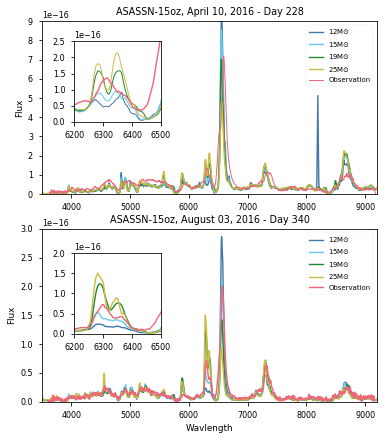

In [221]:
fig = plt.figure(figsize=[6,7])
ax1 = fig.add_subplot(2,1,1)
l0, = ax1.plot(scale_mod12_212.wave, scale_mod12_212.flux, label='12M$\odot$')
l1, = ax1.plot(scale_mod15_212.wave, scale_mod15_212.flux, label='15M$\odot$')
l2, = ax1.plot(scale_mod19_212.wave, scale_mod19_212.flux, label='19M$\odot$')
l3, = ax1.plot(scale_mod25_212.wave, scale_mod25_212.flux, label='25M$\odot$')
l4, = ax1.plot(data_spec_212.wave, data_spec_212.flux, label='Observation', lw=1)

#plt.xlim(4000, 6500)
ax1.set_xlim(3500, 9200)
ax1.set_ylim(0, 9E-16)
ax1.set_ylabel('Flux')
ax1.legend(loc='upper right', fontsize='x-small')
ax1.set_title('ASASSN-15oz, April 10, 2016 - Day 228')
#Inset
ax1_inset = plt.axes([.2, .68, .2, .16])
ax1_inset.plot(scale_mod12_212.wave, scale_mod12_212.flux, lw=1, color=l0.get_color())
ax1_inset.plot(scale_mod15_212.wave, scale_mod15_212.flux, lw=1, color=l1.get_color())
ax1_inset.plot(scale_mod19_212.wave, scale_mod19_212.flux, lw=1, color=l2.get_color())
ax1_inset.plot(scale_mod25_212.wave, scale_mod25_212.flux, lw=1, color=l3.get_color())
ax1_inset.plot(data_spec_212.wave, data_spec_212.flux, color=l4.get_color())

ax1_inset.set_xlim(6200,6500)
ax1_inset.set_ylim(0, 2.5E-16)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(scale_mod12_340.wave, scale_mod12_340.flux, label='12M$\odot$', color=l0.get_color())
ax2.plot(scale_mod15_340.wave, scale_mod15_340.flux, label='15M$\odot$', color=l1.get_color())
ax2.plot(scale_mod19_340.wave, scale_mod19_340.flux, label='19M$\odot$', color=l2.get_color())
ax2.plot(scale_mod25_340.wave, scale_mod25_340.flux, label='25M$\odot$', color=l3.get_color())
ax2.plot(data_spec_340.wave-10, data_spec_340.flux, label='Observation', color=l4.get_color())

#plt.xlim(4000, 6500)
ax2.set_xlim(3500, 9200)
ax2.set_ylim(0, 3E-16)
ax2.set_xlabel('Wavlength')
ax2.set_ylabel('Flux')
ax2.legend(loc='upper right', fontsize='x-small')
#Inset
ax2_inset = plt.axes([.2, .26, .2, .16])
ax2_inset.plot(scale_mod12_340.wave, scale_mod12_340.flux, color=l0.get_color())
ax2_inset.plot(scale_mod15_340.wave, scale_mod15_340.flux, color=l1.get_color())
ax2_inset.plot(scale_mod19_340.wave, scale_mod19_340.flux, color=l2.get_color())
ax2_inset.plot(scale_mod25_340.wave, scale_mod25_340.flux, color=l3.get_color())
ax2_inset.plot(data_spec_340.wave-10, data_spec_340.flux, color=l4.get_color())

ax2_inset.set_xlim(6200,6500)
ax2_inset.set_ylim(0, 2E-16)
ax2.set_title('ASASSN-15oz, August 03, 2016 - Day 340')

plt.savefig(os.path.join(FIG_DIR,'nebular_spectra_OI.pdf'))

# Scale to Ni Mass values

In [19]:
5*np.log10(13.4E6)-5

30.635523991824037

In [21]:
import astropy.units as u
5*np.log10((13.4*u.Mpc).to(u.pc).value)-5

30.635523991824037